In [ ]:
# ML Project-4 : Movie Recommendation

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from math import sqrt

In [ ]:
# 1. Read the data given in both ratings and movies files.

moviesData = pd.read_csv("movies.csv")
ratingsData = pd.read_csv("ratings.csv")

moviesData.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
moviesData = moviesData.drop('genres', axis=1)
moviesData

,movieId,title
0,1,Toy Story (1995)
1,2,Jumanji (1995)
2,3,Grumpier Old Men (1995)
3,4,Waiting to Exhale (1995)
4,5,Father of the Bride Part II (1995)
...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017)
9738,193583,No Game No Life: Zero (2017)
9739,193585,Flint (2017)
9740,193587,Bungo Stray Dogs: Dead Apple (2018)


In [ ]:
ratingsData.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [ ]:
ratingsData = ratingsData.drop("timestamp", axis=1)
ratingsData.head()

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0


In [ ]:
ratingsData[ratingsData["userId"]==607.0]

,userId,movieId,rating,timestamp
98479,607,1,4.0,964744033
98480,607,11,3.0,964744602
98481,607,25,3.0,963078417
98482,607,34,3.0,963079238
98483,607,36,4.0,964744413
...,...,...,...,...
98661,607,4022,4.0,997847173
98662,607,4023,3.0,997847173
98663,607,4054,3.0,997847173
98664,607,4069,3.0,997847203


In [ ]:
# 2. Merge those datasets into one.

In [ ]:
# combData = moviesData.combine_first(ratingsData)
combData = moviesData.merge(ratingsData, on="movieId")
combData.head()

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1510577970
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483


In [ ]:
combData[combData["movieId"]==36]

# moviesData[moviesData["movieId"]==36]

,movieId,title,genres,userId,rating,timestamp
1807,36,Dead Man Walking (1995),Crime|Drama,5,4.0,847435292
1808,36,Dead Man Walking (1995),Crime|Drama,6,5.0,845553726
1809,36,Dead Man Walking (1995),Crime|Drama,11,4.0,902155135
1810,36,Dead Man Walking (1995),Crime|Drama,18,4.0,1455617478
1811,36,Dead Man Walking (1995),Crime|Drama,32,4.0,856736172
...,...,...,...,...,...,...
1869,36,Dead Man Walking (1995),Crime|Drama,590,3.5,1258420766
1870,36,Dead Man Walking (1995),Crime|Drama,602,3.0,840876228
1871,36,Dead Man Walking (1995),Crime|Drama,603,4.0,953925157
1872,36,Dead Man Walking (1995),Crime|Drama,606,3.5,1171820699


In [ ]:
# 3. Extract columns with useful information.

In [ ]:
dataFrame1 = combData[["movieId","userId", "title", "rating", "genres"]]
dataFrame1.tail()

,movieId,userId,title,rating,genres
100831,193581,184,Black Butler: Book of the Atlantic (2017),4.0,Action|Animation|Comedy|Fantasy
100832,193583,184,No Game No Life: Zero (2017),3.5,Animation|Comedy|Fantasy
100833,193585,184,Flint (2017),3.5,Drama
100834,193587,184,Bungo Stray Dogs: Dead Apple (2018),3.5,Action|Animation
100835,193609,331,Andrew Dice Clay: Dice Rules (1991),4.0,Comedy


In [ ]:
dataFrame1.shape

(100836, 5)

In [ ]:
# 4. Generate a pivot table.

In [ ]:
pivotT = dataFrame1.pivot_table(index= ["userId"], values =["rating"], aggfunc='count')
print(pivotT)
print("\n",type(pivotT)), pivotT.shape

        rating
userId        
1          232
2           29
3           39
4          216
5           44
...        ...
606       1115
607        187
608        831
609         37
610       1302

[610 rows x 1 columns]

 <class 'pandas.core.frame.DataFrame'>


(None, (610, 1))

In [ ]:
pivotT1 = pivotT[pivotT["rating"] > 10]
pivotT1

In [ ]:
pivotT.index

Int64Index([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,
            ...
            601, 602, 603, 604, 605, 606, 607, 608, 609, 610],
           dtype='int64', name='userId', length=610)

In [ ]:
# 5. Perform data cleaning by dropping users with less than 10 reviews.

In [ ]:
cleanDataFrame = dataFrame1.iloc[pivotT.index]
cleanDataFrame

,movieId,userId,title,rating,genres
1,1,5,Toy Story (1995),4.0,Adventure|Animation|Children|Comedy|Fantasy
2,1,7,Toy Story (1995),4.5,Adventure|Animation|Children|Comedy|Fantasy
3,1,15,Toy Story (1995),2.5,Adventure|Animation|Children|Comedy|Fantasy
4,1,17,Toy Story (1995),4.5,Adventure|Animation|Children|Comedy|Fantasy
5,1,18,Toy Story (1995),3.5,Adventure|Animation|Children|Comedy|Fantasy
...,...,...,...,...,...
606,9,402,Sudden Death (1995),3.0,Action
607,9,428,Sudden Death (1995),2.0,Action
608,9,437,Sudden Death (1995),3.0,Action
609,9,456,Sudden Death (1995),4.0,Action


In [ ]:
# 6. Create a correlation matrix

In [ ]:
dataFrame1.corr()

,movieId,userId,rating
movieId,1.000000,0.006773,-0.004061
userId,0.006773,1.000000,-0.049348
rating,-0.004061,-0.049348,1.000000


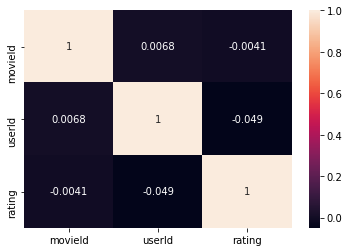

In [ ]:
corrMatrix = dataFrame1.corr()

sn.heatmap(corrMatrix, annot = True)
plt.show()

In [ ]:
# 7. Get user input by getting movie names and ratings from user.

In [ ]:
movieName = input ("Enter Movie Name :")

ratings  = input ("Enter Movie ratings :")
print("Movie Name :",movieName)
print("Movie ratings :",ratings)

Enter Movie Name :Mission Impossible-4
Enter Movie ratings :4.5
Movie Name : Mission Impossible-4
Movie ratings : 4.5


In [ ]:
userInput = [{'title':'Breakfast Club, The (1985)', 'rating':5},
             {'title':'Toy Story (1995)', 'rating':3.5},
             {'title':'Jumanji (1995)', 'rating':2},
             {'title':'Pulp Fiction (1994)', 'rating':5},
             {'title':'Akira (1988)', 'rating':4.5}]

inputMovies = pd.DataFrame(userInput)
inputMovies

,title,rating
0,"Breakfast Club, The (1985)",5.0
1,Toy Story (1995),3.5
2,Jumanji (1995),2.0
3,Pulp Fiction (1994),5.0
4,Akira (1988),4.5


In [ ]:
# 8. Generate Recommendations based on user preferences and correlation matrix that the user provides. 

In [ ]:
inputID = moviesData[moviesData["title"].isin(inputMovies["title"].tolist())]
inputID

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
257,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
973,1274,Akira (1988),Action|Adventure|Animation|Sci-Fi
1445,1968,"Breakfast Club, The (1985)",Comedy|Drama


In [ ]:
inputMovies = pd.merge(inputID, inputMovies)
inputMovies

,movieId,title,genres,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.5
1,2,Jumanji (1995),Adventure|Children|Fantasy,2.0
2,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,5.0
3,1274,Akira (1988),Action|Adventure|Animation|Sci-Fi,4.5
4,1968,"Breakfast Club, The (1985)",Comedy|Drama,5.0


In [ ]:
#Filter the users who have watched the movies in the input

usersSubset = ratingsData[ratingsData["movieId"].isin(inputMovies["movieId"].tolist())]
# usersSubset = usersSubset.drop("timestamp", axis=1)
usersSubset.head()

,userId,movieId,rating
0,1,1,4.0
16,1,296,3.0
320,4,296,1.0
422,4,1968,4.0
516,5,1,4.0


In [ ]:
# Group the rows by userId

usersGroup = usersSubset.groupby("userId")
usersGroup.head()

,userId,movieId,rating
0,1,1,4.0
16,1,296,3.0
320,4,296,1.0
422,4,1968,4.0
516,5,1,4.0
...,...,...,...
99510,609,296,4.0
99534,610,1,5.0
99552,610,296,5.0
99636,610,1274,5.0


In [ ]:
# Sort user groups, so the users that share the most movies in common with the input have higher priority

usersGroup = sorted(usersGroup, key=lambda x: len(x[1]), reverse=True)
usersGroup, len(usersGroup)

([(91,        userId  movieId  rating
   14121      91        1     4.0
   14122      91        2     3.0
   14173      91      296     4.5
   14316      91     1274     5.0
   14383      91     1968     3.0), (177,        userId  movieId  rating
   24900     177        1     5.0
   24901     177        2     3.5
   24930     177      296     5.0
   25069     177     1274     2.0
   25129     177     1968     3.5), (219,        userId  movieId  rating
   31524     219        1     3.5
   31525     219        2     2.5
   31554     219      296     4.0
   31628     219     1274     2.5
   31680     219     1968     3.0), (274,        userId  movieId  rating
   39229     274        1     4.0
   39230     274        2     3.5
   39288     274      296     5.0
   39448     274     1274     4.0
   39549     274     1968     4.0), (298,        userId  movieId  rating
   44535     298        1     2.0
   44536     298        2     0.5
   44555     298      296     4.5
   44620     298     127

In [ ]:
correlationDict = {}

for name, group in usersGroup:
  print ("Name  :",name, "\n")
  print ("\nGroup :",group, "\n")
  group = group.sort_values("movieId")

  #print("Before Sorting :",inputMovies)
  inputMovies = inputMovies.sort_values("movieId")
  # print("After Sorting :",inputMovies)

  numofRatings = len(group)

  #Getting review scores of the movies that are common 
  tempDataFrame = inputMovies[inputMovies["movieId"].isin(group["movieId"].tolist())]

  #print (tempDataFrame)

  # Store the ratings in a list
  tempRatingsList = tempDataFrame["rating"].tolist()


  # Store the group ratings in a list
  groupRatingsList = group["rating"].tolist()

  #print("Temp RatingsList :",tempRatingsList)
  #print("Group RatingsList :",groupRatingsList)

  # Calculate the pearson correlation between two users, x and y
  sqrX = sum([i**2 for i in tempRatingsList]) - (pow(sum(tempRatingsList),2)/float(numofRatings))
  sqrY = sum([i**2 for i in groupRatingsList]) - (pow(sum(groupRatingsList),2)/float(numofRatings))
  sqrXY = sum( i*j for i, j in zip(tempRatingsList, groupRatingsList)) - (sum(tempRatingsList)*sum(groupRatingsList)/float(numofRatings))

  #If denominator is not a zero, then divide, else, 0 correlation.
  if sqrX != 0 and sqrY != 0:
    correlationDict[name] = sqrXY/sqrt(sqrX*sqrY)
  else:
    correlationDict[name] = 0 

print("Correlation Dictionary :",correlationDict)


Name  : 91 


Group :        userId  movieId  rating
14121      91        1     4.0
14122      91        2     3.0
14173      91      296     4.5
14316      91     1274     5.0
14383      91     1968     3.0 

Name  : 177 


Group :        userId  movieId  rating
24900     177        1     5.0
24901     177        2     3.5
24930     177      296     5.0
25069     177     1274     2.0
25129     177     1968     3.5 

Name  : 219 


Group :        userId  movieId  rating
31524     219        1     3.5
31525     219        2     2.5
31554     219      296     4.0
31628     219     1274     2.5
31680     219     1968     3.0 

Name  : 274 


Group :        userId  movieId  rating
39229     274        1     4.0
39230     274        2     3.5
39288     274      296     5.0
39448     274     1274     4.0
39549     274     1968     4.0 

Name  : 298 


Group :        userId  movieId  rating
44535     298        1     2.0
44536     298        2     0.5
44555     298      296     4.5
44620     

In [ ]:
# Converting the dictionary to a dataframe 

corrDataFrame = pd.DataFrame.from_dict(correlationDict,orient="index")
corrDataFrame.columns = ["similarityIndex"]
corrDataFrame["userId"] = corrDataFrame.index
corrDataFrame.index = range(len(corrDataFrame))
corrDataFrame.head()

,similarityIndex,userId
0,0.438529,91
1,0.000000,177
2,0.451243,219
3,0.716115,274
4,0.959271,298


In [ ]:
len(corrDataFrame)

419

In [ ]:
# Get top 50 users similar to the input

top50Users=corrDataFrame.sort_values(by="similarityIndex", ascending=False)[0:50]
top50Users.head()

,similarityIndex,userId
43,1.0,132
181,1.0,382
219,1.0,602
130,1.0,130
129,1.0,125


In [ ]:
# Get the movies watched by the users in corrDataFrame from the ratings dataframe 

top50UsersRating=top50Users.merge(ratingsData, left_on="userId", right_on="userId", how="inner")
top50UsersRating.head()

,similarityIndex,userId,movieId,rating
0,1.0,132,1,2.0
1,1.0,132,17,3.0
2,1.0,132,29,2.0
3,1.0,132,32,3.0
4,1.0,132,34,1.5


In [ ]:
# Get weightedRating by multiplying the similarity and user’s ratings

top50UsersRating["weightedRating"] = top50UsersRating["similarityIndex"]*top50UsersRating["rating"]
top50UsersRating.head()

,similarityIndex,userId,movieId,rating,weightedRating
0,1.0,132,1,2.0,2.0
1,1.0,132,17,3.0,3.0
2,1.0,132,29,2.0,2.0
3,1.0,132,32,3.0,3.0
4,1.0,132,34,1.5,1.5


In [ ]:
# Group by userId and apply sum to the topUsers

topUsersRating = top50UsersRating.groupby("movieId").sum()[["similarityIndex","weightedRating"]]
topUsersRating.columns = ["sum-similarityIndex","sum-weightedRating"]
topUsersRating.head()

,sum-similarityIndex,sum-weightedRating
movieId,,
1,36.0,124.0
2,18.0,58.0
3,3.0,11.0
5,3.0,8.5
6,13.0,49.5


In [ ]:
recommendDataFrame = pd.DataFrame()

recommendDataFrame["weighted average recommendation score"] = topUsersRating["sum-weightedRating"]/topUsersRating["sum-similarityIndex"]
recommendDataFrame["movieId"] = topUsersRating.index
recommendDataFrame.head()

,weighted average recommendation score,movieId
movieId,,
1,3.444444,1
2,3.222222,2
3,3.666667,3
5,2.833333,5
6,3.807692,6


In [ ]:
# Get top 10 recommended movies

recommendDataFrame = recommendDataFrame.sort_values(by="weighted average recommendation score", ascending=False)
recommendDataFrame.head(10)

,weighted average recommendation score,movieId
movieId,,
3035,5.0,3035
1956,5.0,1956
2522,5.0,2522
2495,5.0,2495
2477,5.0,2477
163386,5.0,163386
2455,5.0,2455
2450,5.0,2450
2427,5.0,2427


In [ ]:
moviesData.loc[moviesData["movieId"].isin(recommendDataFrame.head(10)["movieId"].tolist())]

,movieId,title
1433,1956,Ordinary People (1980)
1826,2427,"Thin Red Line, The (1998)"
1842,2450,Howard the Duck (1986)
1846,2455,"Fly, The (1986)"
1865,2477,Firewalker (1986)
1877,2495,"Fantastic Planet, The (Planète sauvage, La) (1..."
1898,2522,Airport '77 (1977)
2288,3035,Mister Roberts (1955)
9380,163112,Winnie the Pooh Goes Visiting (1971)
9382,163386,Winnie the Pooh and the Day of Concern (1972)
